# Coupled Oscillator model
$$
\begin{aligned}
\vec{F}_1 &= -k_1\vec{x}_1-k_2\vec{x}_1+k_2\vec{x}_2
\\
\vec{F}_2 &= -k_3\vec{x}_2-k_2\vec{x}_2+k_2\vec{x}_1
\end{aligned},
$$
which is
$$
\begin{cases}
\displaystyle \frac{d^2x_1}{dt^2} &= \displaystyle -\frac{k_1\vec{x}_1+k_2\left(\vec{x}_1-\vec{x}_2\right)}{m_1}
\\[2ex]
\displaystyle \frac{d^2x_1}{dt^2} &= \displaystyle -\frac{k_3\vec{x}_2+k_2\left(\vec{x}_2-\vec{x}_1\right)}{m_2}
\end{cases}
$$

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from lib.RungeKutta import * 

plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 13,
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsfonts}"
})

In [15]:
(k1, k2, k3) = [1.0, 1.0, 1.0]
(m1, m2) = (1.0, 1.0)

def F(t,U):
    (x1_,x2_,v1_,v2_) = (U[0],U[1],U[2],U[3])
    a1_ = -(k1 * x1_ + k2 * (x1_ - x2_))/m1
    a2_ = -(k3 * x2_ + k2 * (x2_ - x1_))/m2
    return np.array([v1_,v2_,a1_,a2_])

In [24]:
dt = 0.01
t_end = 50
t = np.arange(0,t_end,dt)
U0 = np.array([
    -1.0, # x1(t=0)
    1.0,  # x2(t=0)
    0.0,  # v1(t=0)
    0.0,  # v2(t=0)
]).T 

U = RK4(F, U0, t, dt)

(x1,x2,v1,v2) = (U[:,0],U[:,1],U[:,2],U[:,3])

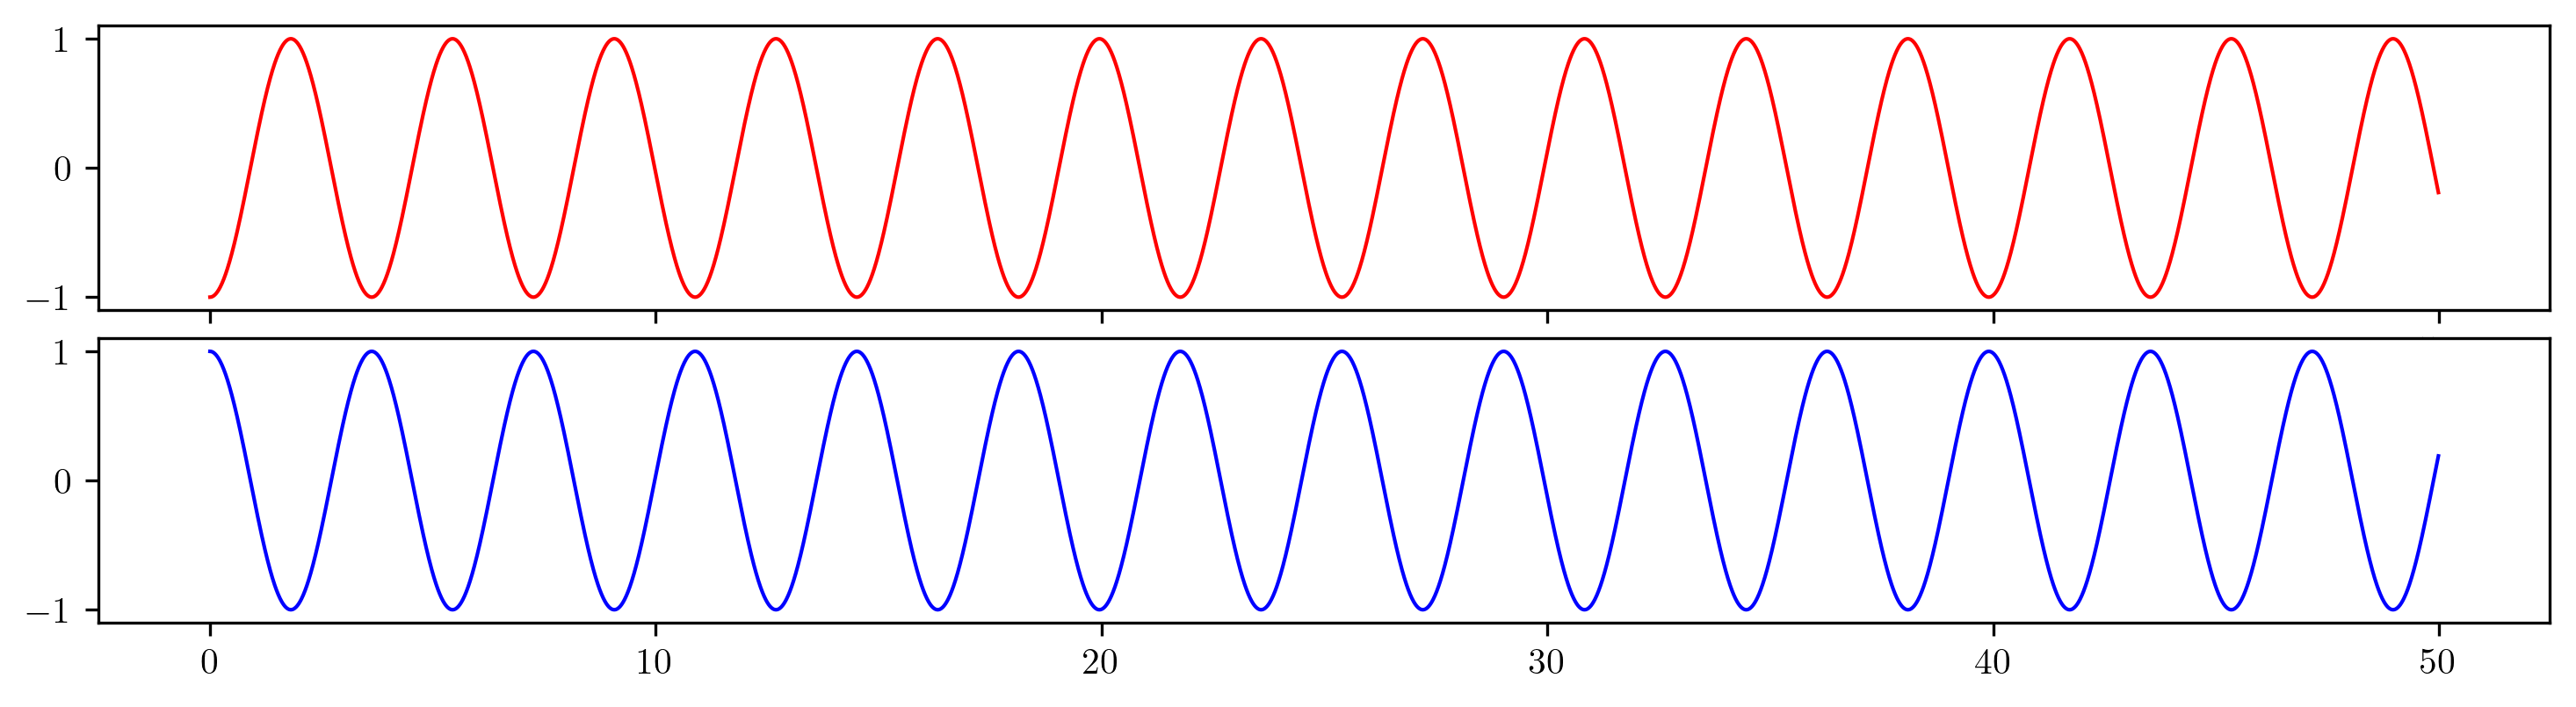

In [25]:
fig = plt.figure(figsize=(12,3),dpi=300)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(t, x1, linewidth=1, color='r')
ax2.plot(t, x2, linewidth=1, color='b')

fig.subplots_adjust(hspace=0.1)
plt.show()

In [77]:
def Model(k=(1.0, 1.0, 1.0),m=(1.0, 1.0),
    dt=0.01,t_end=50,
    x1_i=-1,x2_i=1,v1_i=0,v2_i=0,
    figsize=(12,3)):
    
    (k1, k2, k3) = k
    (m1, m2) = m

    def F(t,U):
        (x1_,x2_,v1_,v2_) = (U[0],U[1],U[2],U[3])
        a1_ = -(k1 * x1_ + k2 * (x1_ - x2_))/m1
        a2_ = -(k3 * x2_ + k2 * (x2_ - x1_))/m2
        return np.array([v1_,v2_,a1_,a2_])
    
    t = np.arange(0,t_end,dt)
    U0 = np.array([x1_i,x2_i,v1_i,v2_i,]).T 
    print("Solve ODE...")
    U = RK4(F, U0, t, dt)
    print("done")
    (x1,x2,v1,v2) = (U[:,0],U[:,1],U[:,2],U[:,3])

    fig = plt.figure(figsize=(12,3),dpi=300)
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.plot(t, x1, linewidth=1, color='r')
    ax2.plot(t, x2, linewidth=1, color='b')
    ax1.scatter(t[0], x1[0], color='r')
    ax2.scatter(t[0], x2[0], color='b')
    ax1.hlines(y=0,xmin=0,xmax=t_end, linewidth=0.5, color='k')
    ax2.hlines(y=0,xmin=0,xmax=t_end, linewidth=0.5, color='k')
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.set_xlabel("$x_1$")
    ax2.set_xlabel("$x_2$")
    ax2.set_xlabel("$t$")
    fig.subplots_adjust(hspace=0.0)
    plt.show()
    return None

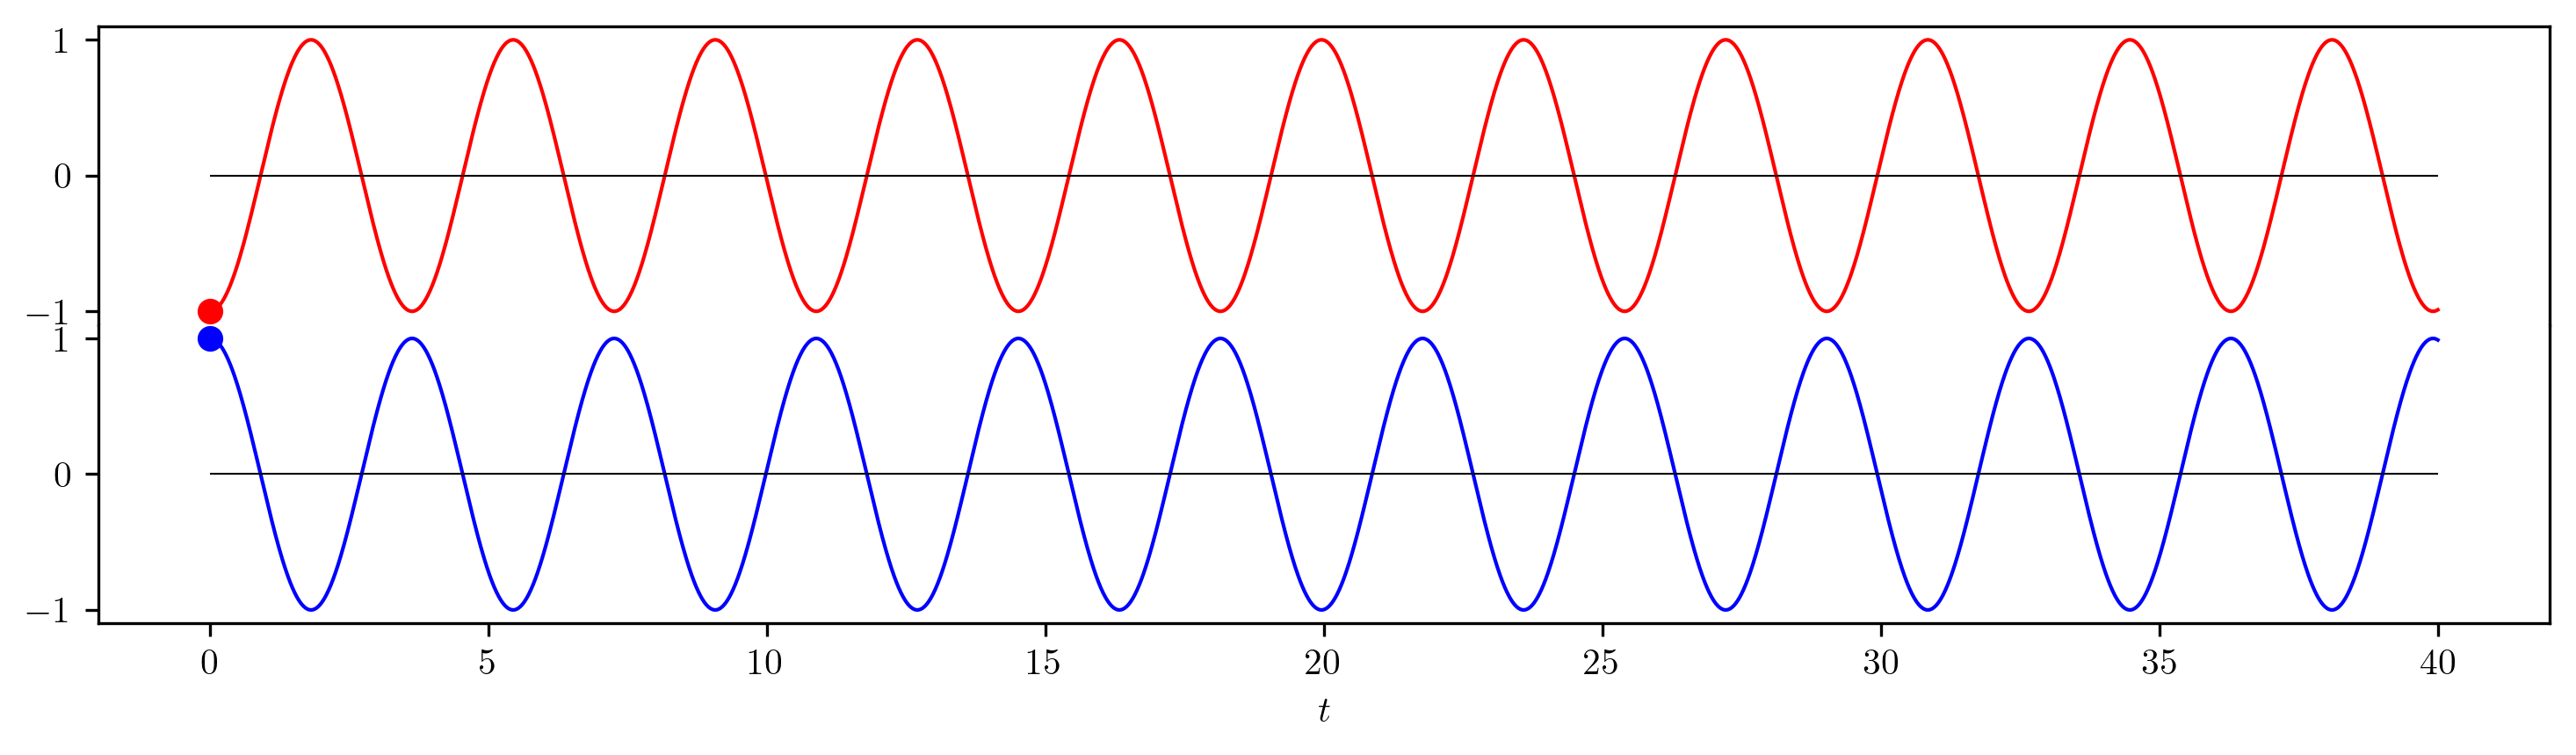

In [72]:
Model(
    k=(1.0, 1.0, 1.0),
    m=(1.0, 1.0),
    dt=0.01,t_end=40,
    x1_i=-1,x2_i=1,v1_i=0,v2_i=0
)

Solve ODE...
done


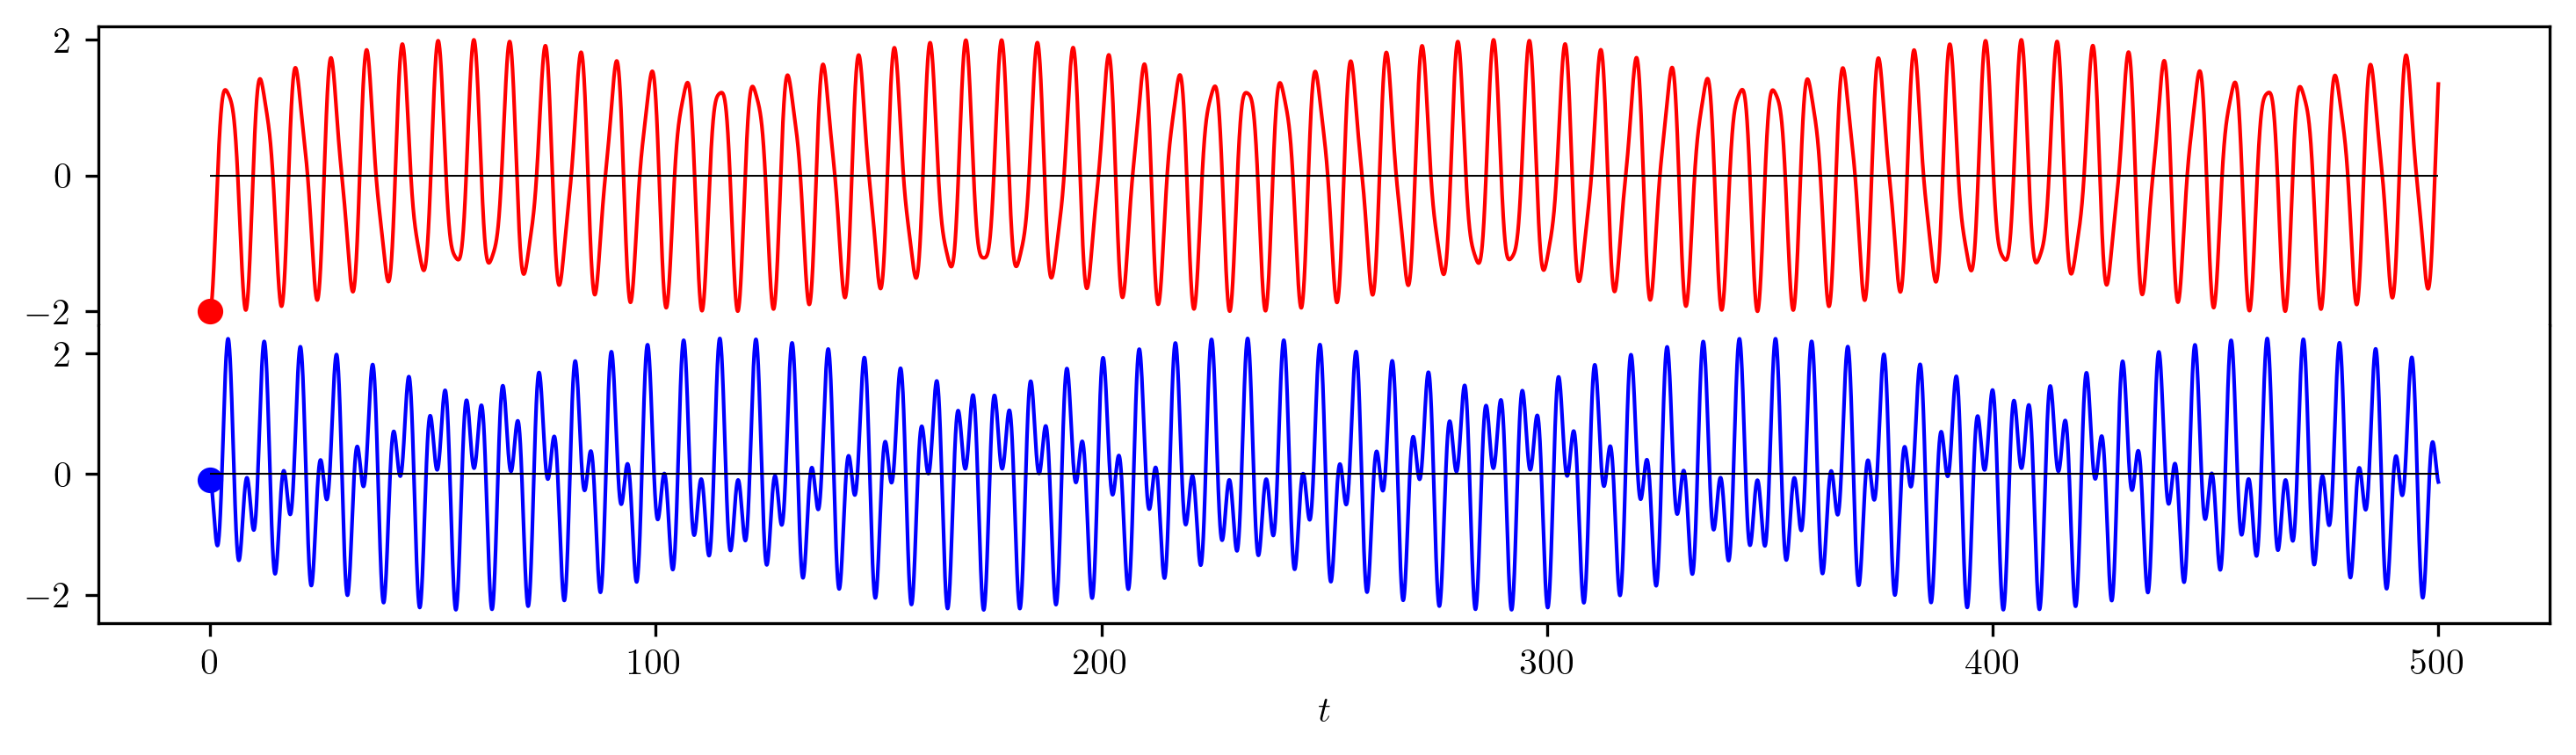

In [81]:
Model(
    k=(1.0, 1.0, 1.0),
    m=(2.0, 1.0),
    dt=0.01,t_end=500,
    x1_i = -2.0,
    x2_i = -0.1,
    v1_i = 0,
    v2_i = 0
)

Solve ODE...
done


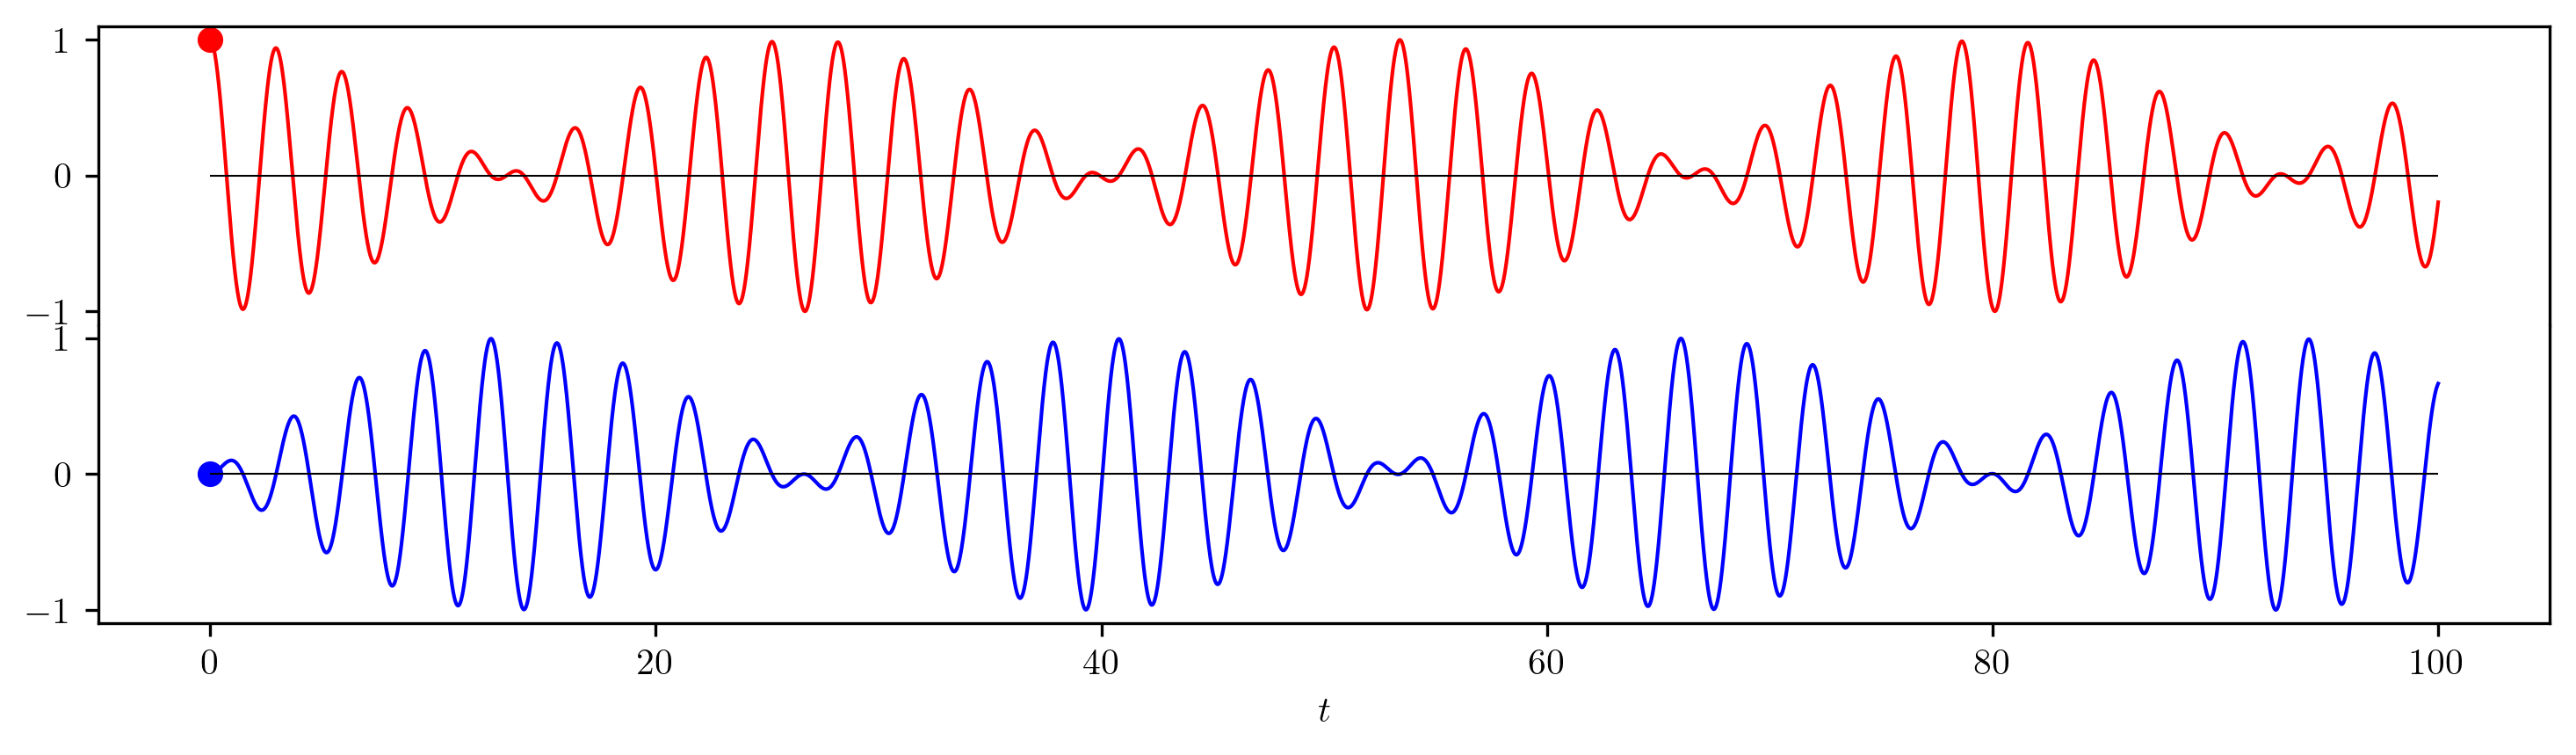

In [84]:
Model(
    k=(4.0, 0.5, 4.0),
    m=(1.0, 1.0),
    dt=0.01,t_end=100,
    x1_i=1,x2_i=0,v1_i=0,v2_i=0
)